<a href="https://colab.research.google.com/github/srajabhoj/Capstone/blob/master/Capstone_Credit_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Capstone Credit Fraud Detection**

## **Importing required libraries**

In [ ]:
#For handling data
import pandas as pd
import numpy as np

In [ ]:
# ploting charts
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#For treating skewness and outliers (data preparation)
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

# For Over Sampling
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

#For Spliting data
from sklearn.model_selection import train_test_split

In [ ]:
# Modeling
# import required libraries
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# !pip install xgboost

In [ ]:
# For model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# For model evaluation
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve,auc

In [ ]:
# for displaying rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
%matplotlib inline

Importing libraries for google drive

In [ ]:
# !pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


Authenticating user for google drive

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
gdrive = GoogleDrive(gauth)

## **Import and Read data file from google drive**

In [ ]:
link="https://drive.google.com/open?id=1-dQtsHvNZyy82vOq38cl2_QnmIRKd46T"
fluff, id = link.split('=')
downloaded = gdrive.CreateFile({'id':id}) 
downloaded.GetContentFile('creditcard.csv')  
df = pd.read_csv('creditcard.csv')

In [ ]:
orig_df=df.copy()

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As per stated in problem statment no null values present in dataset so no null value treatment required


## **EDA**

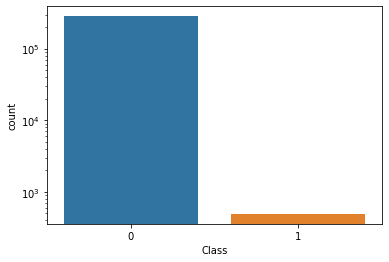

In [ ]:
countPlot=sns.countplot(x="Class", data=df)
countPlot.set_yscale("log")

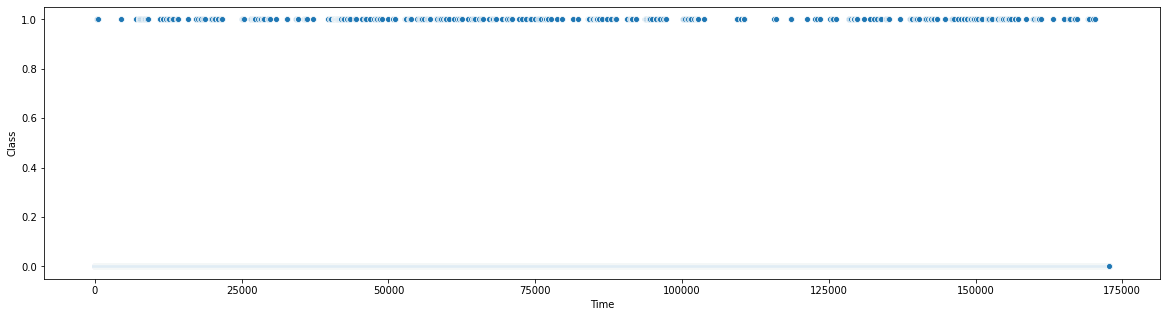

In [ ]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=df['Time'],y=df['Class'])
plt.show()

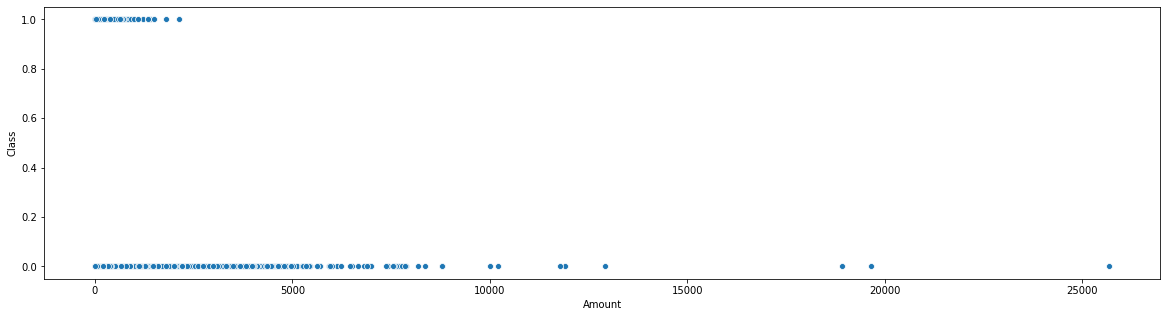

In [ ]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=df['Amount'],y=df['Class'])
plt.show()

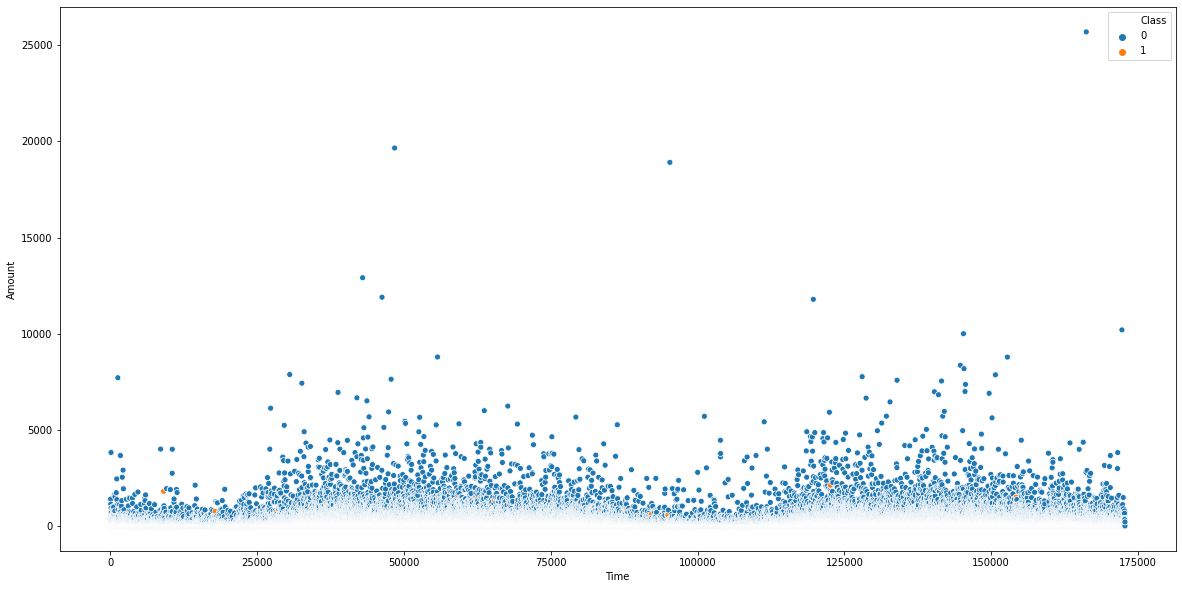

In [ ]:
plt.figure(figsize=(20, 10))
time_vs_amount=sns.scatterplot(x=df['Time'],y=df['Amount'], hue=df['Class'])
plt.show()

In [ ]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

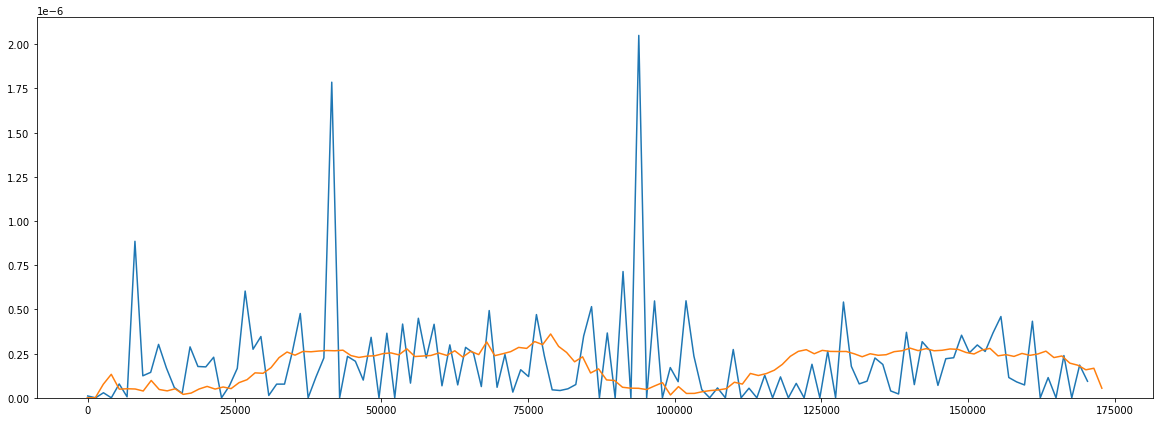

In [ ]:
plt.figure(figsize=(20, 7))
sns.distplot(fraud, hist=False)
sns.distplot(normal, hist=False)
plt.show()

## **Preprocessing Data**

### Split Data into Train and test data set

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Here we are dropping <font color="red">Time</font> column as its nothing but sequence of transaction**

In [ ]:
X = df.drop(['Class','Time'], axis = 1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4, stratify = y)

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
32587,1.118214,0.106565,0.496715,1.329811,-0.274445,0.001885,-0.108446,0.179254,0.174499,0.076974,1.167434,0.735274,-1.286111,0.478920,-0.696586,-0.538222,0.145555,-0.423453,-0.145846,-0.263992,-0.052227,0.011923,-0.031689,0.216326,0.573206,-0.338769,0.030683,0.004675,2.49
66824,1.110689,-0.790834,-0.068013,-0.549846,-1.002038,-1.104068,0.002166,-0.218157,-1.331157,0.822710,1.335892,0.227979,-0.715075,0.737667,0.033544,-1.280405,-0.033170,0.911872,-0.306701,-0.272310,-0.610845,-1.707393,0.140500,0.495465,-0.038479,0.665269,-0.115654,0.017087,137.85
190646,-7.064740,-2.554973,-1.797861,0.953308,2.287548,-0.440777,2.132619,-4.964853,2.597996,3.960915,0.892912,-0.545750,-1.584013,-1.333921,-0.654997,-0.312820,-1.417503,-0.281796,0.717681,-5.194299,0.799742,0.533808,1.766213,-0.334919,0.284873,-0.777862,-2.430088,1.519429,53.53
24534,0.891489,-0.516256,0.565781,-0.651170,-1.230588,-0.528140,-0.967792,0.059895,-0.091169,0.929836,-1.117591,-1.744710,-1.093052,-0.339448,1.328968,1.496026,0.069432,-0.334548,0.887485,-0.042454,0.449537,1.206595,0.146671,-0.127267,-0.946685,-0.148488,-0.110726,-0.140378,19.99
226448,-1.019646,-0.557527,-0.294692,-1.029449,0.088448,-0.156261,0.863181,-0.110347,-1.143577,0.772399,0.628038,0.531266,0.650971,0.173705,-0.417529,-1.831419,-0.379430,1.979287,-0.475055,-0.050682,0.078441,0.935274,0.134374,0.729578,-0.295664,-0.095489,0.606621,0.441124,222.50


### Power Tranform

In [ ]:
x_cols=X_train.columns
x_cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

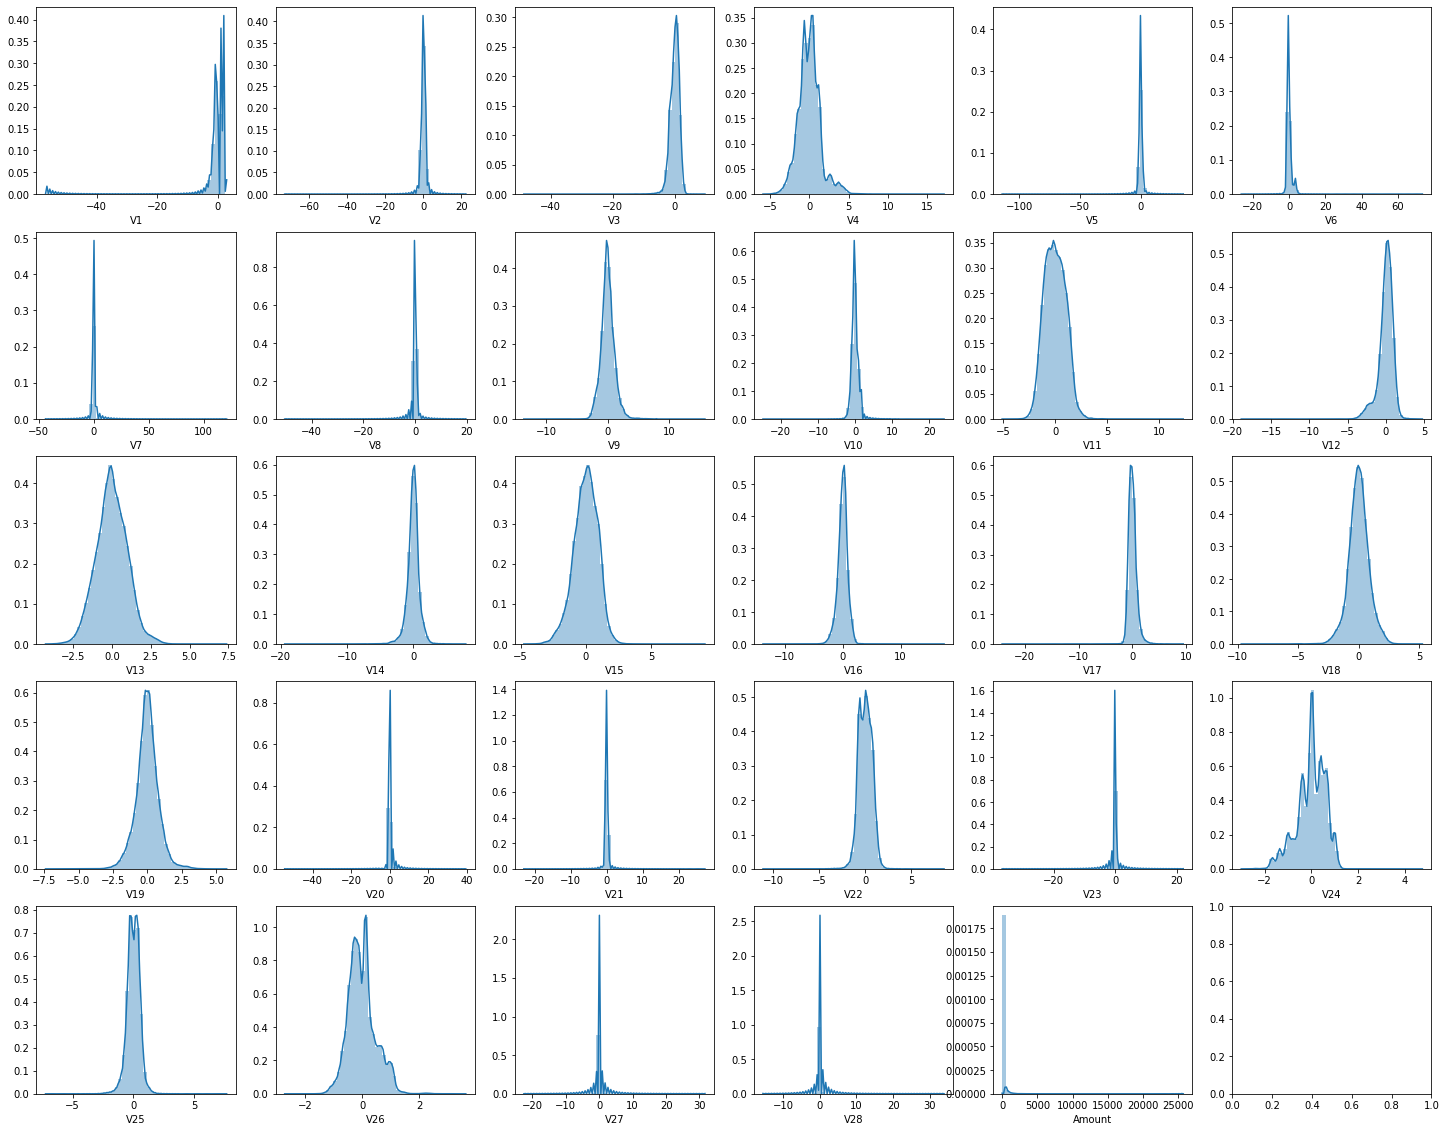

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=6,figsize=(25, 20))
for i, column in enumerate(X_train.columns):
    sns.distplot(X_train[column],ax=axes[i//6,i%6])
plt.show()

All most all principal components and features are normally distributed but most of them are suffered with skewness.

Power transform

In [ ]:
power_transformer=PowerTransformer();
X_train_trans=power_transformer.fit_transform(X_train)
X_test_trans=power_transformer.transform(X_test)

X_train_trans_df=pd.DataFrame(X_train_trans,columns=x_cols)
X_test_trans_df=pd.DataFrame(X_test_trans,columns=x_cols)

In [ ]:
X_train_trans_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.564491,-0.017153,0.223488,0.954549,-0.214655,0.118615,-0.084253,0.102191,0.213180,0.117192,1.134865,0.779874,-1.301505,0.470105,-0.785824,-0.669666,0.139175,-0.523184,-0.171433,-0.344102,-0.054788,-0.003971,-0.061025,0.279868,1.118021,-0.673885,0.065760,0.024776,-1.167059
1,0.558045,-0.568548,-0.201169,-0.334853,-0.734438,-0.885912,0.005402,-0.288111,-1.262982,0.780629,1.284368,0.085889,-0.714182,0.787503,-0.020617,-1.406156,-0.077933,1.095740,-0.370817,-0.354751,-0.863487,-2.269910,0.222638,0.816033,-0.112872,1.334990,-0.294850,0.062802,1.071905
2,-2.505442,-1.502129,-1.192864,0.717920,1.701785,-0.256746,1.709912,-3.621794,2.177954,3.263317,0.887981,-0.714989,-1.609839,-1.356375,-0.744058,-0.429154,-1.631010,-0.357166,0.883549,-6.493247,1.100624,0.728498,3.009899,-0.632103,0.524165,-1.823405,-5.664268,4.417918,0.537774
3,0.375209,-0.408053,0.279787,-0.413795,-0.895931,-0.335417,-0.785345,-0.019516,-0.029466,0.872308,-1.113208,-1.602318,-1.102353,-0.432074,1.531865,1.923620,0.046077,-0.419130,1.088559,-0.059739,0.635438,1.701633,0.232862,-0.310918,-1.746800,-0.226644,-0.282775,-0.423152,-0.031047
4,-0.764587,-0.432555,-0.352376,-0.715715,0.048931,-0.010715,0.698381,-0.186333,-1.067975,0.737309,0.645406,0.485341,0.661640,0.114098,-0.501896,-1.913148,-0.484781,2.453812,-0.580372,-0.070328,0.128241,1.305921,0.212493,1.300194,-0.595469,-0.108056,1.521886,1.336073,1.335591


In [ ]:
X_test_trans_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.752314,0.786478,2.100968,1.510852,0.629795,0.788789,0.436960,0.250904,-1.344602,0.210178,-1.788663,-0.687321,0.429239,-0.616109,-1.244518,1.822144,-1.452128,0.197857,-2.764308,-0.105184,0.259960,0.514158,-0.685713,0.946464,1.398659,0.186608,0.026602,0.235554,-0.094042
1,-0.184479,0.839366,-0.171136,0.520644,0.652470,-0.439602,0.982408,-0.500680,-0.138686,0.686374,-1.078262,-0.319723,0.600844,-0.005670,0.770596,-0.567593,-0.726333,0.031681,0.824130,0.385127,0.022481,0.682970,-0.222373,-0.789753,-1.072859,-0.796175,0.953917,0.192302,-1.576492
2,1.286026,-0.439095,-0.339544,0.282956,-0.488954,0.018694,-0.641661,-0.067768,2.172877,-0.363006,1.317629,-1.475725,1.532973,1.712197,-0.972758,0.371191,-0.130234,1.234588,0.092668,-0.208082,0.134250,0.832051,0.092530,-0.663914,-0.422951,0.271274,-0.069250,-0.158108,0.498676
3,-0.801878,-0.886154,0.337811,1.308471,-1.087380,0.816212,-0.559172,-2.090650,0.033509,-0.898220,0.656003,1.502360,-0.665582,0.493295,-1.003438,-0.245179,0.185005,0.581597,0.593570,2.411566,-1.303394,0.312680,-1.098379,0.592782,1.731101,-0.349594,-0.196372,0.692622,1.886336
4,-0.657547,0.215325,1.569729,-0.521947,0.039341,0.330627,0.062039,0.075984,1.349912,-1.041948,1.215630,-1.652817,1.862790,1.279056,-1.451418,1.221911,-0.686975,1.092049,-1.072805,-0.306333,-0.002126,0.277992,-0.266556,-0.823627,-0.999304,0.131037,0.015476,0.357845,0.455405


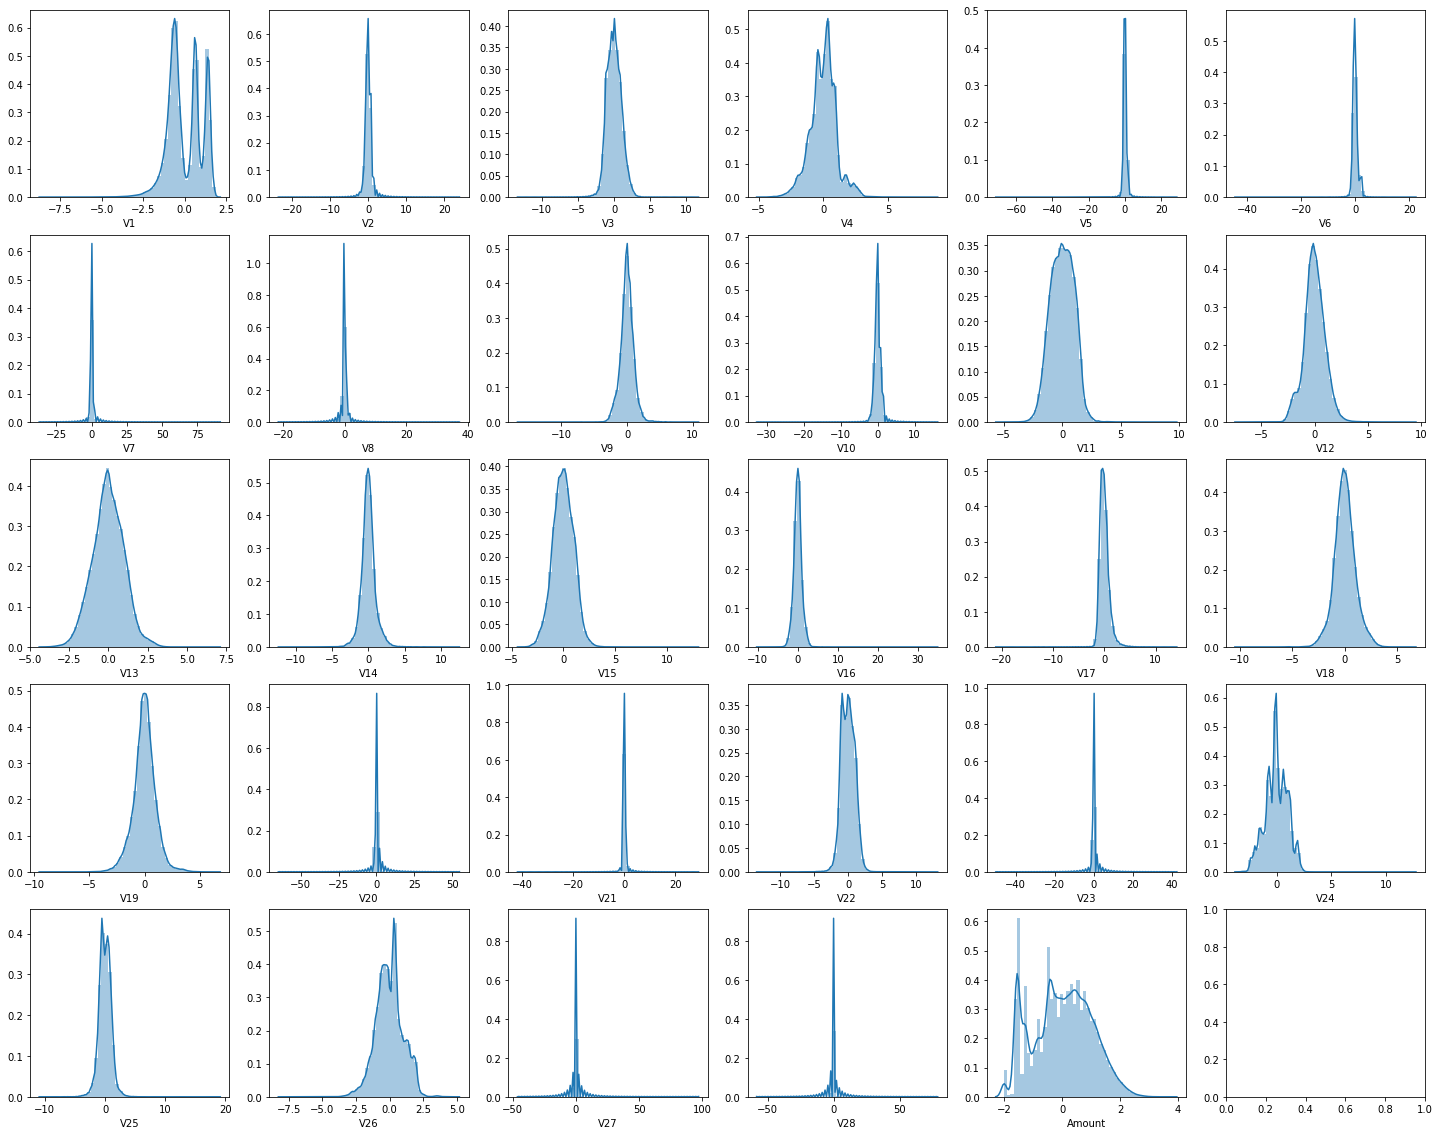

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=6,figsize=(25, 20))
for i, column in enumerate(X_train_trans_df.columns):
    sns.distplot(X_train_trans_df[column],ax=axes[i//6,i%6])
plt.show()

In [ ]:
orig_X_train=X_train.copy()
orig_X_test=X_test.copy()

In [ ]:
X_train=X_train_trans_df.copy()
X_test=X_test_trans_df.copy()

In [ ]:
# X_train_trans_df
# X_test_trans_df

## **Functions for Model Evaluations**

In [ ]:
def printModelSummary(y_true,y_pred): 
  lr_accuracy = accuracy_score(y_true, y_pred)
  lr_recall = recall_score(y_true, y_pred)
  lr_cm = confusion_matrix(y_true, y_pred)
  lr_auc = roc_auc_score(y_true, y_pred)

  print("Accuracy: {:.4%}".format(lr_accuracy))
  print("Recall: {:.4%}".format(lr_recall))
  print("ROC AUC: {:.4%}".format(lr_auc))

  lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
  plt.figure(figsize = (8,4))
  sns.set(font_scale=1.4)
  sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

## **Modeling Before Over Sampling**

### Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
lr_predict = lr.predict(X_test)

Accuracy: 99.9309%
Recall: 72.9730%
ROC AUC: 86.4753%


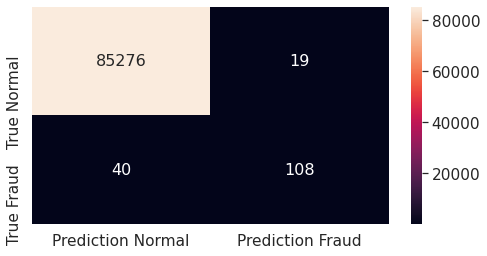

In [ ]:
printModelSummary(y_test,lr_predict)

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_predict = dt.predict(X_test)

Accuracy: 99.9169%
Recall: 75.0000%
ROC AUC: 87.4801%


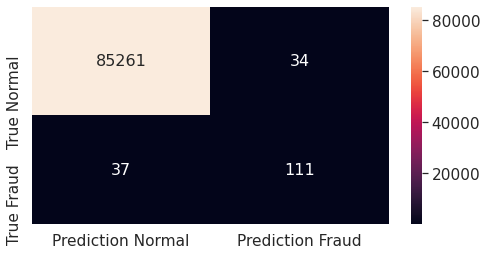

In [ ]:
printModelSummary(y_test,dt_predict)

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1,)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rf_predict = rf.predict(X_test)

Accuracy: 99.9544%
Recall: 79.7297%
ROC AUC: 89.8596%


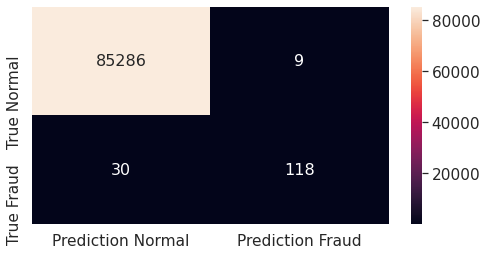

In [ ]:
printModelSummary(y_test,rf_predict)

### XGBoost

In [ ]:
xgb=XGBClassifier(n_estimators=300, max_depth=7)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_predict=xgb.predict(X_test);

Accuracy: 99.9555%
Recall: 80.4054%
ROC AUC: 90.1974%


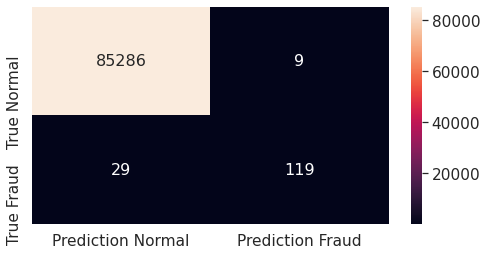

In [ ]:
printModelSummary(y_test,xgb_predict)

## **Unsupervised Modeling with Oversampling**

As seen in sample modeling section, modeling is able to predict frauds, well we know that there is much of class imbalance already, still model performing well means there is scope to improve it further with **oversampling**.

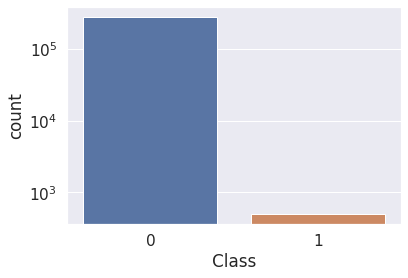

In [ ]:
countPlot=sns.countplot(x="Class", data=df)
countPlot.set_yscale("log")

In [ ]:
# X.head()

In [ ]:
# y.head()

### Oversampling with SMOTE

In [ ]:
X_smote_resampled, y_smote_resampled = SMOTE(random_state=0).fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_smote_resampled.shape

(568630, 29)

In [ ]:
y_smote_resampled.shape

(568630,)

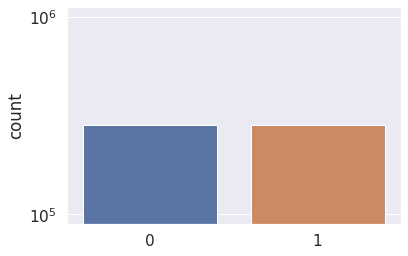

In [ ]:
countPlot_sr=sns.countplot(x=y_smote_resampled)
countPlot_sr.set_yscale("log")

In [ ]:
X_train_sr, X_test_sr, y_train_sr, y_test_sr = train_test_split(X_smote_resampled, y_smote_resampled, test_size = 0.30, random_state = 4, stratify = y_smote_resampled)

In [ ]:
smoke_resampled_lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
smoke_resampled_lr.fit(X_train_sr, y_train_sr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
smoke_resampled_lr_predict = lr.predict(X_test_sr)

Accuracy: 77.6392%
Recall: 55.3263%
ROC AUC: 77.6391%


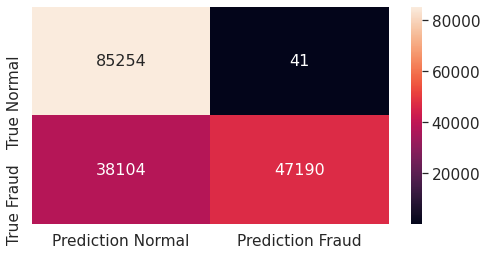

In [ ]:
printModelSummary(y_test_sr,smoke_resampled_lr_predict)

### OverSampling with ADASYN

In [ ]:
X_adasyn_resampled, y_adsyn_resampled = ADASYN(random_state=0).fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_adasyn_resampled.shape

(568555, 29)

In [ ]:
y_adsyn_resampled.shape

(568555,)

In [ ]:
(unique, counts) = np.unique(y_adsyn_resampled, return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [ ]:
frequencies

array([[     0, 284315],
       [     1, 284240]])

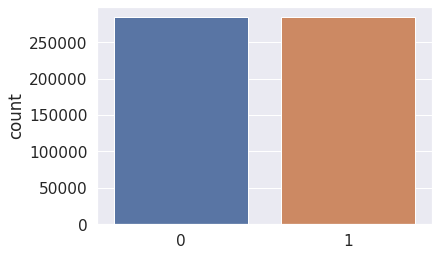

In [ ]:
countPlot_ar=sns.countplot(x=y_adsyn_resampled)
# y_adsyn_resampled.groupby
# countPlot_ar.set_yscale("log")

In [ ]:
# Split data on recent oversampling
X_train_ar, X_test_ar, y_train_ar, y_test_ar = train_test_split(X_adasyn_resampled, y_adsyn_resampled, test_size = 0.30, random_state = 4, stratify = y_adsyn_resampled)

In [ ]:
adasyn_resampled_lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
adasyn_resampled_lr.fit(X_train_ar, y_train_ar)

In [ ]:
adasyn_resampled_lr_predict = lr.predict(X_test_ar)

Accuracy: 57.7327%
Recall: 15.5022%
ROC AUC: 57.7270%


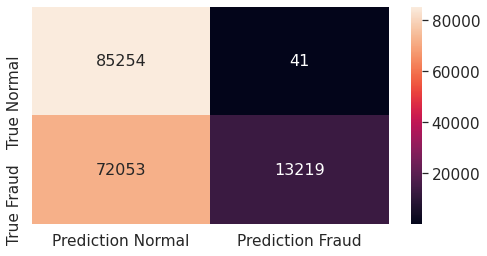

In [ ]:
printModelSummary(y_test_ar,adasyn_resampled_lr_predict)

### Oversampling with SMOTETomek

In [ ]:
X_smotetomek_resampled, y_smotetomek_resampled = SMOTETomek(random_state=0).fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_smotetomek_resampled.shape  

(568630, 29)

In [ ]:
y_smotetomek_resampled.shape

(568630,)

In [ ]:
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(X_smotetomek_resampled, y_smotetomek_resampled, test_size = 0.30, random_state = 4, stratify = y_smotetomek_resampled)

In [ ]:
smotetomek_resampled_lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
smotetomek_resampled_lr.fit(X_train_str, y_train_str)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
smotetomek_resampled_lr_predict = smotetomek_resampled_lr.predict(X_test_str)

Accuracy: 95.9575%
Recall: 93.7123%
ROC AUC: 95.9575%


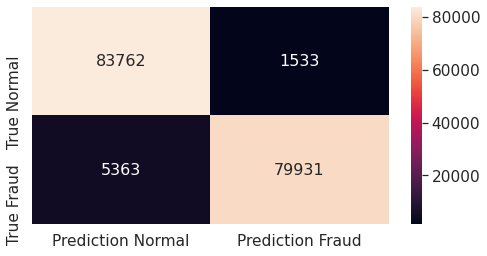

In [ ]:
printModelSummary(y_test_str,smotetomek_resampled_lr_predict)

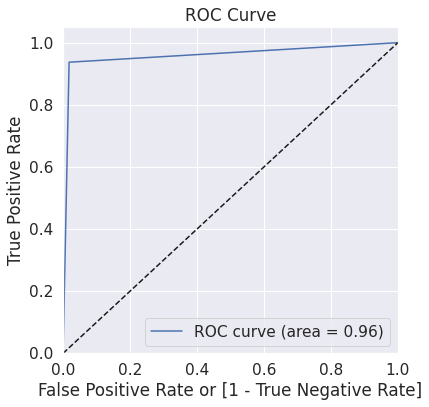

(array([0.        , 0.01797292, 1.        ]),
 array([0.        , 0.93712336, 1.        ]),
 array([2, 1, 0]))

In [ ]:
draw_roc(y_test_str, smotetomek_resampled_lr_predict)

### Conclusion

We used smotetomek to avoid tomek links well, with both smote and smotetomek model performing same. For ADASYN ist not performing well. 

Hence SMOTETomek oversampling method performing best in unsupervised modeling Hence we can go with same for supervised modeling to get more accuracy

Copying splitted data to normal variables again to make it easier for further modeling and process

In [ ]:
# X_train_str, X_test_str, y_train_str, y_test_str

Preserve copies of **before over sampling** (bos)

In [ ]:
X_train_bos=X_train.copy()
X_test_bos=X_test.copy()
y_train_bos=y_train.copy()
y_test_bos=y_test.copy()

In [ ]:
type(y_train)

pandas.core.series.Series

Convert oversampled X arrays to df

In [ ]:
X_train_oversampled_df=pd.DataFrame(X_train_str,columns=x_cols)
X_test_oversampled_df=pd.DataFrame(X_test_str,columns=x_cols)

Convert oversampled y arrays to series

In [ ]:
y_train_oversampled_df=pd.Series(y_train_str)
y_test_oversampled_df=pd.Series(y_test_str)

In [ ]:
X_train=X_train_oversampled_df.copy()
X_test=X_test_oversampled_df.copy()
y_train=y_train_oversampled_df.copy()
y_test=y_test_oversampled_df.copy()

## **Supervised Modeling**

***We won't use knn algorithm as it works best for max 10000 data points. As we have more than 500k (after oversampling)  data points, if we use it here we will be facing major performance issues.***

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',max_depth=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=20, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [ ]:
dt_predict = dt.predict(X_test)

In [ ]:
dt.get_n_leaves()

619

In [ ]:
dt.get_depth()

20

In [ ]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

Accuracy: 99.8036%
Recall: 99.9109%
ROC AUC: 99.8036%


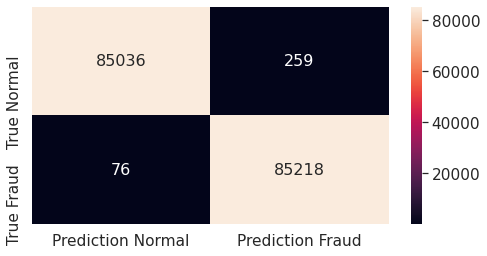

In [ ]:
printModelSummary(y_test,dt_predict)

### Random Forest

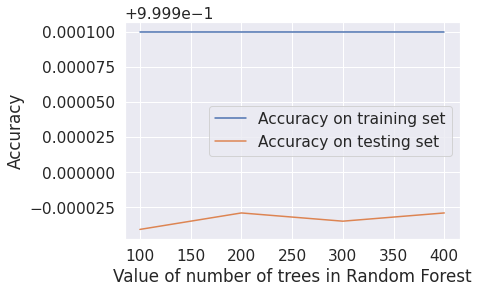

In [ ]:
tree_range = range(100, 500, 100)
score1=[]
score2=[]
for tree in tree_range:
    rf=RandomForestClassifier(n_estimators= tree, criterion = 'entropy', random_state = 0, n_jobs = -1)
    rf.fit(X_train,y_train)
    score1.append(rf.score(X_train,y_train))
    score2.append(rf.score(X_test,y_test))

plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in Random Forest')
plt.ylabel('Accuracy')
plt.legend()

best number of trees to start with : 200

In [ ]:
rf = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rf_predict = rf.predict(X_test)

Accuracy: 99.9871%
Recall: 100.0000%
ROC AUC: 99.9871%


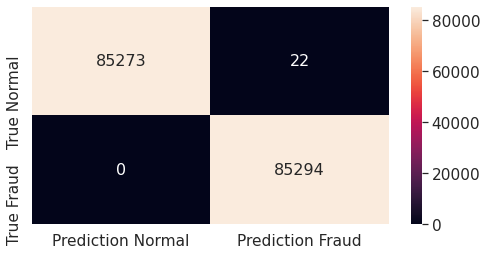

In [ ]:
printModelSummary(y_test,rf_predict)

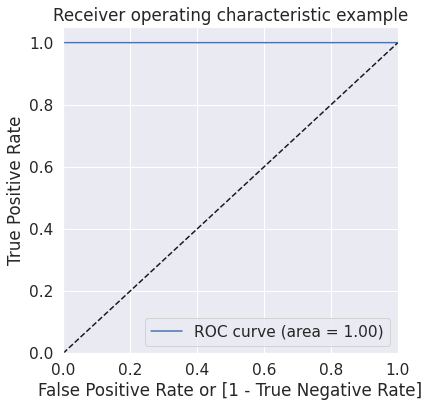

(array([0.00000000e+00, 2.57928366e-04, 1.00000000e+00]),
 array([0., 1., 1.]),
 array([2, 1, 0]))

In [ ]:
draw_roc(y_test, rf_predict)

In [ ]:
# rf

### XGBoost

Here we will need to find number of optimum estimators, so we will run loop here to find those:-

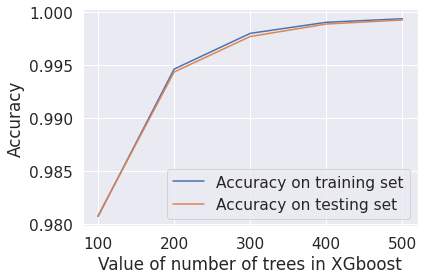

In [ ]:
tree_range = range(100, 600, 100)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))

plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

best number of trees to start with : 500

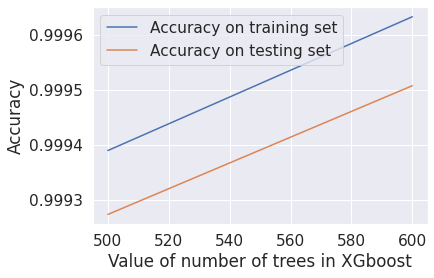

In [ ]:
tree_range = range(600, 800, 100)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))

plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
xgb=XGBClassifier(n_estimators=700)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_predict=xgb.predict(X_test);

Accuracy: 99.9619%
Recall: 100.0000%
ROC AUC: 99.9619%


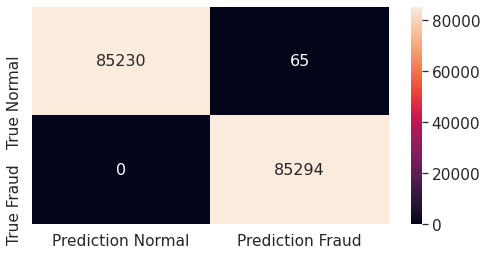

In [ ]:
printModelSummary(y_test,xgb_predict)

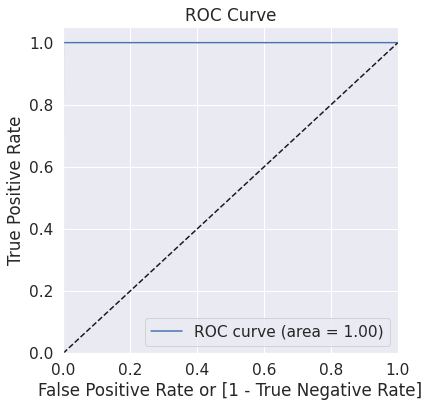

(array([0.00000000e+00, 7.62061082e-04, 1.00000000e+00]),
 array([0., 1., 1.]),
 array([2, 1, 0]))

In [ ]:
draw_roc(y_test, xgb_predict)

## **Hyperparameter tuning**

From last evaluations its clear that **Random Forest and XGBoost** are doing great job so we will evaluate and tune these models only



### Random Forest

In [ ]:
X_train.shape[1]

29

In [ ]:
# Create the parameter grid based on the results of random search 
rf_param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [200,400], 
    'max_features': [10, 15, X_train.shape[1]]
}
#SK Fold
skfold = StratifiedKFold(n_splits=5, random_state=100)
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = rf_param_grid, 
                          cv = skfold, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rf_grid_search.best_score_,'using',rf_grid_search.best_params_)

We can get accuracy of 0.992488210016102 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 400} still but we know that without using these params

### XGBoost

In [ ]:
# Create the parameter grid based on the results of random search 
xgb_param_grid = {
    "eta"    : [ 0.2, 0.3, 0.4] ,
    "max_depth"        : [ 6, 8, 10],
    "min_child_weight" : [ 1, 3, 5],
    "n_estimators": [600, 700, 800]
}
#SK Fold
skfold = StratifiedKFold(n_splits=5, random_state=100)

# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
xgb_grid_search = GridSearchCV(estimator = xgb, param_grid = xgb_param_grid, 
                          cv = skfold, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
xgb_grid_search.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',xgb_grid_search.best_score_,'using',xgb_grid_search.best_params_)

## **Final Connclusion**

Random Forest and XGBoost are competing neck to neck for auc_roc. In performance wise We found Random Forest is better than XGBoost. Well That may be because of several parameters. Still with only **200** trees Random Forest giving best AUC

**Hence the final conclusion is Random Forest is doing great job and suggested for using in actual business scenario**

In [ ]:
rf = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rf.fit(X_train, y_train)

In [ ]:
rf_predict = rf.predict(X_test)

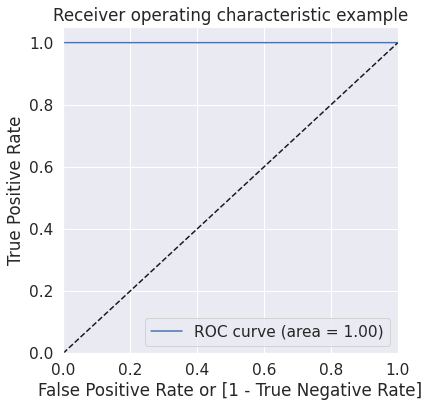

(array([0.00000000e+00, 2.57928366e-04, 1.00000000e+00]),
 array([0., 1., 1.]),
 array([2, 1, 0]))

In [ ]:
draw_roc(y_test, rf_predict)

Accuracy: 99.9871%
Recall: 100.0000%
ROC AUC: 99.9871%


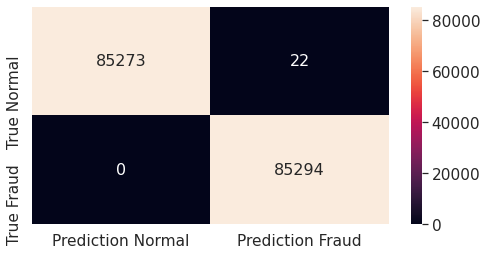

In [ ]:
printModelSummary(y_test,rf_predict)

Kudos! Thanks!